In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reading the data
co_data = pd.read_csv("/home/deepak/4th semester/ML/Project/dataset/crude-oil-price.csv", parse_dates=['date'])

# Selecting required columns
co_data = co_data[['date', 'price']]

# Sorting values by date
co_data = co_data.sort_values(by='date')

# Data scaling
scaler = MinMaxScaler()
co_data['price_scaled'] = scaler.fit_transform(co_data[['price']])

# Splitting data into train and test sets
train_size = int(len(co_data) * 0.8)
train_data, test_data = co_data[:train_size], co_data[train_size:]



In [14]:
# # Define sequence length
# seq_length = 24 # Using 24 months of historical data to predict the next month

# # Create sequences for training and testing
# X_train, y_train = create_sequences(train_data, seq_length)
# X_test, y_test = create_sequences(test_data, seq_length)

# # Reshape data for input to GRU model
# X_train = X_train.reshape(-1, seq_length, 1)
# X_test = X_test.reshape(-1, seq_length, 1)

# # Build GRU model
# model = Sequential([
#     GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dense(units=1)
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# history = model.fit(X_train, y_train, epochs=800, batch_size=16, validation_data=(X_test, y_test), verbose=2)


Epoch 1/800


/home/deepak/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 1s - 54ms/step - loss: 2771.3123 - val_loss: 4732.7197
Epoch 2/800
23/23 - 0s - 6ms/step - loss: 2659.2285 - val_loss: 4567.2695
Epoch 3/800
23/23 - 0s - 5ms/step - loss: 2564.6445 - val_loss: 4447.2837
Epoch 4/800
23/23 - 0s - 6ms/step - loss: 2464.9905 - val_loss: 4259.5376
Epoch 5/800
23/23 - 0s - 6ms/step - loss: 2349.9312 - val_loss: 4038.8462
Epoch 6/800
23/23 - 0s - 6ms/step - loss: 2242.8782 - val_loss: 3912.1843
Epoch 7/800
23/23 - 0s - 7ms/step - loss: 2183.2234 - val_loss: 3828.1562
Epoch 8/800
23/23 - 0s - 6ms/step - loss: 2132.0735 - val_loss: 3731.7476
Epoch 9/800
23/23 - 0s - 6ms/step - loss: 2071.8457 - val_loss: 3628.5540
Epoch 10/800
23/23 - 0s - 6ms/step - loss: 2013.1298 - val_loss: 3518.8254
Epoch 11/800
23/23 - 0s - 6ms/step - loss: 1952.8354 - val_loss: 3412.8687
Epoch 12/800
23/23 - 0s - 6ms/step - loss: 1891.3317 - val_loss: 3312.7312
Epoch 13/800
23/23 - 0s - 6ms/step - loss: 1842.1494 - val_loss: 3232.0122
Epoch 14/800
23/23 - 0s - 6ms/step - loss: 17

In [19]:
seq_length = 12 # Using 12 months of historical data to predict the next month

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape data for input to GRU model
X_train = X_train.reshape(-1, seq_length, 1)
X_test = X_test.reshape(-1, seq_length, 1)

# Build GRU model
model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])
# # Build GRU model
# model = Sequential([
#     GRU(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dense(units=1)
# ])

model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=2)



# # model.compile(optimizer='adam', loss='mean_squared_error')

# # # Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# # Make predictions




Epoch 1/1000


/home/deepak/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 2s - 157ms/step - loss: 2677.8167 - val_loss: 4537.1743
Epoch 2/1000
12/12 - 0s - 7ms/step - loss: 2531.2781 - val_loss: 4335.7476
Epoch 3/1000
12/12 - 0s - 8ms/step - loss: 2415.3328 - val_loss: 4191.2178
Epoch 4/1000
12/12 - 0s - 7ms/step - loss: 2313.1809 - val_loss: 4018.2678
Epoch 5/1000
12/12 - 0s - 8ms/step - loss: 2209.1196 - val_loss: 3854.0339
Epoch 6/1000
12/12 - 0s - 8ms/step - loss: 2118.3538 - val_loss: 3651.7756
Epoch 7/1000
12/12 - 0s - 7ms/step - loss: 2004.7362 - val_loss: 3476.1277
Epoch 8/1000
12/12 - 0s - 8ms/step - loss: 1921.6143 - val_loss: 3365.8254
Epoch 9/1000
12/12 - 0s - 8ms/step - loss: 1857.8470 - val_loss: 3248.1926
Epoch 10/1000
12/12 - 0s - 7ms/step - loss: 1791.6084 - val_loss: 3116.3684
Epoch 11/1000
12/12 - 0s - 8ms/step - loss: 1726.8252 - val_loss: 3009.7822
Epoch 12/1000
12/12 - 0s - 7ms/step - loss: 1669.9635 - val_loss: 2913.4189
Epoch 13/1000
12/12 - 0s - 8ms/step - loss: 1613.3397 - val_loss: 2831.9939
Epoch 14/1000
12/12 - 0s - 7ms/s

In [20]:
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Mean Squared Error: 80.9634500337501


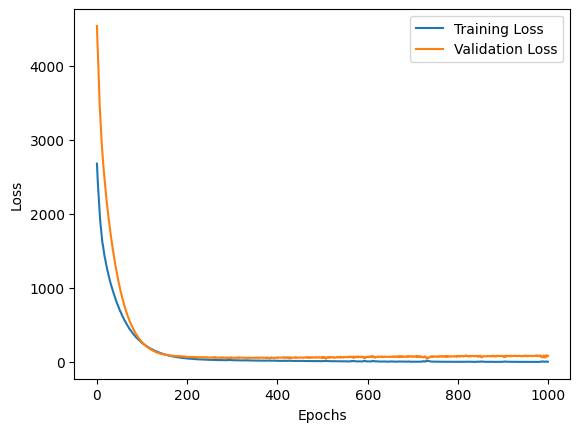

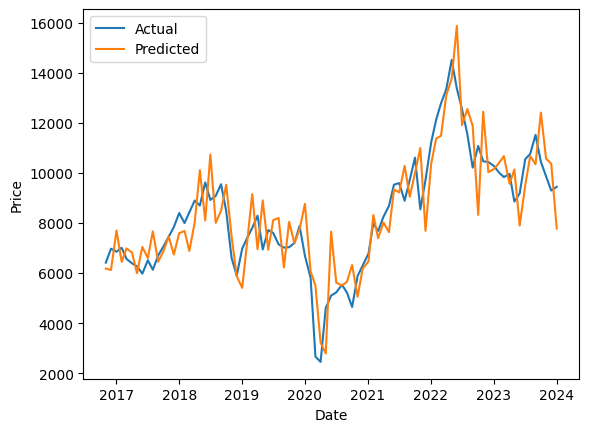

In [21]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions
plt.plot(test_data['date'].iloc[seq_length:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(test_data['date'].iloc[seq_length:], scaler.inverse_transform(y_pred), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 7.222012764555832


In [23]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 8.997969217203963


In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.7605580562856251
